# Необходимо провести приоритизацию гипотез и анализ А/В-теста

<a href='#data_description'>1. Описание данных.</a>

<a href='#part1'>2. Нужно загрузить данные и применить фрейморвки `ICE` и `RICE` для приоритизации гипотез.</a>

<a href='#part1_changing'>3. Расписать, как изменились приоритеты после применения двух методов.</a>

<a href='#ab_tests'>4. Провести ряд А/В-тестов и проанализировать выводы.</a>

<a href='#conclusion'>5. Принять решение по результатам тестов и объяснить их, сделать общий вывод.</a>

<a id='data_description'></a>
**Описание данных**

Данные для первой части
Файл `/datasets/hypothesis.csv.` 
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
Файл `/datasets/orders.csv.`
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv.`
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

<a id='part1'></a>
## Приоритизация гипотез. (Часть 1)

### Ознакомление с датафреймом.

Импортируем библиотеки и читаем данные датафрейма.

In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
data1 = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [4]:
pd.options.display.max_colwidth = 110
data1

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применим способ приоритизации задач `ICE`

ICE скоринг – это относительно быстрый способ присвоить конкретное числовое значение различным проектам или идеям для обозначения их приоритетности.

In [5]:
pd.options.display.max_colwidth = 65
data1['ICE'] = data1['Impact'] * data1['Confidence'] / data1['Efforts']
print(data1[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2))

                                                         Hypothesis    ICE
8           Запустить акцию, дающую скидку на товар в день рождения  16.20
0  Добавить два новых канала привлечения трафика, что позволит п...  13.33
7  Добавить форму подписки на все основные страницы, чтобы собра...  11.20
6  Показать на главной странице баннеры с актуальными акциями и ...   8.00
2  Добавить блоки рекомендаций товаров на сайт интернет магазина...   7.00
1  Запустить собственную службу доставки, что сократит срок дост...   2.00
5  Добавить страницу отзывов клиентов о магазине, что позволит у...   1.33
3  Изменить структура категорий, что увеличит конверсию, т.к. по...   1.12
4  Изменить цвет фона главной страницы, чтобы увеличить вовлечен...   1.00


### Применим способ приоритизации задач `RICE`

Rice Score — первый и довольно простой метод приоритизации идей. С его помощью мы с легкостью можем оценить задачи в проекте, и в дальнейшем сформировать последовательный план реализации продукта.
Основное отличие заключается в том, что метод RICE скоринга предполагает ещё и оценку охвата, т.е. предполагаемой целевой аудитории проекта.

In [6]:
data1['RICE'] = data1['Reach'] * data1['Impact'] * data1['Confidence'] / data1['Efforts']
print(data1[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                         Hypothesis   RICE
7  Добавить форму подписки на все основные страницы, чтобы собра...  112.0
2  Добавить блоки рекомендаций товаров на сайт интернет магазина...   56.0
0  Добавить два новых канала привлечения трафика, что позволит п...   40.0
6  Показать на главной странице баннеры с актуальными акциями и ...   40.0
8           Запустить акцию, дающую скидку на товар в день рождения   16.2
3  Изменить структура категорий, что увеличит конверсию, т.к. по...    9.0
1  Запустить собственную службу доставки, что сократит срок дост...    4.0
5  Добавить страницу отзывов клиентов о магазине, что позволит у...    4.0
4  Изменить цвет фона главной страницы, чтобы увеличить вовлечен...    3.0


<a id='part1_changing'></a>
### Подитог приоритизации гипотез:
Приоритеты у способов `ICE` и `RICE` сильно разнятся, но в целом лидеры и аутсайдеры по гипотезам одиннаковые, меняется лишь их скоринг. Элементы у систем скоринга совпадают по 3/4 пунктам, однако, ключевое отличие 'Reach' - элемент "охават" вносит свои изменения в общую формулу вычисления, из-за этого и поменялась приоритизация гипотез.

---

## Анализ А/В-теста. (Часть 2)

### Ознакомление с датафреймом.

Читаем данные датафреймов.

In [7]:
visitors, orders = (
    pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv'), # датафрейм с посетителями
    pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')  # датафрейм с заказами
)

Выводим типы столбцов и ознакамливаемся с датафреймами.

In [8]:
visitors.info()
visitors.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
orders.info()
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


### Предобработка данных и подготовках их к анализу.

#### Изменим название столбцов.

In [10]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


#### Проверка пропусков.

Убедимся, что пропусков в датафреймах нет.

In [12]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [13]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

#### Изменение типов данных.

In [14]:
visitors.info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
# датафрейм с посетителями
visitors['date'] = pd.to_datetime(visitors['date'])

# датафрейм с заказами
orders['date'] = pd.to_datetime(orders['date'])

#### Проверим дубликаты.

In [16]:
visitors.duplicated().sum()

0

In [17]:
orders.duplicated().sum()

0

#### Проверим аномальные значения.

In [18]:
(
visitors[['date', 'group', 'visitors']]
    .apply ([ 'min', 'max'])
)

,date,group,visitors
min,2019-08-01,A,361
max,2019-08-31,B,770


In [19]:
(
orders[['date', 'group', 'revenue']]
    .apply ([ 'min', 'max'])
)

,date,group,revenue
min,2019-08-01,A,50
max,2019-08-31,B,1294500


### Подитог пунтка 1. (Часть 2)

**Датафреймы не подлежали какому-либо кардинальному изменению по типам столбцов или удалению дулбикатов/пропусков. Были проделаны следующие шаги:**
- названия столбцов переименованы,
- типы данных изменены у столбцов с датой и временем,
- дубликаты не найдены,
- пропуски не найдены,
- аномалии не найдены;

Дата начала теста: *01.08.2019*
Дата окончания теста: *31.08.2019*

In [20]:
duplicated_values = (np.intersect1d(orders.query('group == "A"')['visitor_id'], 
                                    orders.query('group == "B"')['visitor_id'], assume_unique = False))
duplicated_values


array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [21]:
len(np.intersect1d(orders.query('group == "A"')['visitor_id'], 
                   orders.query('group == "B"')['visitor_id'], assume_unique = True))

166

---

<a id='ab_tests'></a>
## Задачи по анализу А/В-тестов. (Часть 2)

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

- создадим отдельный датафрейм `datesGroups` с уникальными парами значений 'date' и 'group' из таблицы 'orders'.
- объявим переменные `ordersAggregated` и `visitorsAggregated` с необходимыми столбцами и данными.
- затем добавим ещё одну преременную `cumulativeData` объединив 2 датафрейма `ordersAggregated` и `visitorsAggregated`.

In [22]:
# датафрейм datesGroups с уникальными парами значений date и group, таблицы orders
datesGroups = orders[['date','group']].drop_duplicates() 

# переменная с агрегированными данными о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({
        'date' : 'max',
        'group' : 'max',
        'transaction_id' : 'nunique',
        'visitor_id' : 'nunique',
        'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# переменная с агрегированными данными о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({
        'date' : 'max',
        'group' : 'max',
        'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# соединение кумулятивные данные в одной таблицу и и называем столбцы
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'] 

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [23]:
check_date = pd.DataFrame()
check_date['initial_data'] = orders['date']
check_date['new_df'] = cumulativeData['date']
check_date[['initial_data', 'new_df']].apply(['min', 'max'])

,initial_data,new_df
min,2019-08-01,2019-08-01
max,2019-08-31,2019-08-31


- объявим переменные `cumulativeRevenueA` и `cumulativeRevenueB`, в которых сохраним данные о датах, выручке и числе заказов в группах A и B.

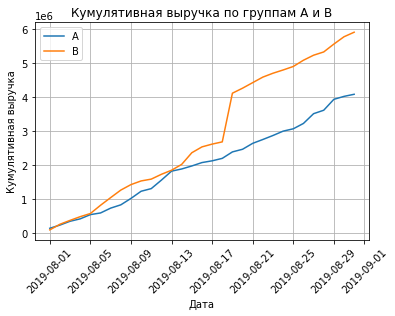

In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по группам А и В')
plt.legend() 
plt.grid(True)
plt.ylabel("Кумулятивная выручка")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.show()

В налаче теста сегмент "В" вырвался вперёд и продолжал лидировать весь остаток теста. Скорее всего аномально большие заказы влияют на результат, в дальнейшем надо будет от них избавиться.

---

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

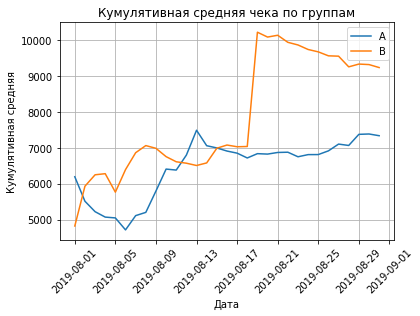

In [25]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивная средняя чека по группам')
plt.legend() 
plt.grid(True)
plt.ylabel("Кумулятивная средняя")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.show()

По графикам видно, что имеются сильные колебания у сегментов. Необходимо провести дополнительный анализ выбросов, которые сильно искажают результаты.

---

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Чтоб построить график относительного изменения кумулятивного среднего чека группы В к группе А, необходимо:
- объединить таблицы `cumulativeRevenueA` и `cumulativeRevenueB` и сохранить всё в переменную.

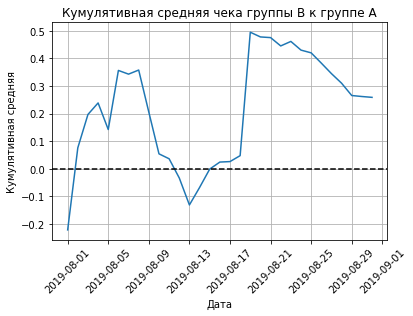

In [26]:
# объединяем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (
    mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Кумулятивная средняя чека группы В к группе А')
plt.grid(True)
plt.ylabel("Кумулятивная средняя")
plt.xlabel("Дата")
plt.xticks(rotation=45)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Видны сильные колебания в разные даты, видимо именно тогда были совершены аномальные заказы.

---

### Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.

Для построения такого графика нам необходимо добавить столбце `conversion` с отношением числа заказов к количеству пользователей в определённой группе в определённый день.

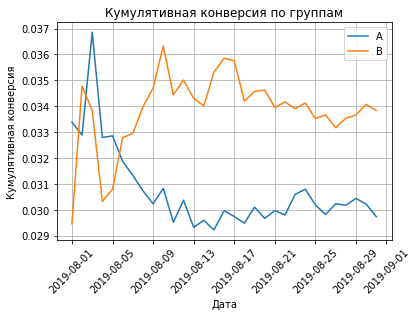

In [27]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные для группы A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные для группы B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('Кумулятивная конверсия по группам')
plt.grid(True)
plt.ylabel("Кумулятивная конверсия")
plt.xlabel("Дата")
plt.legend()
plt.xticks(rotation=45)
plt.show()

В начале теста сегмент А имел большу конверсию, но со временем сегмент В вышел в лидеры и колеблется примерно в одном диапазоне. Однакое, конверсия сегмента А снизилась сначала теста и упала в начало сегмента В и там зафиксировалась.

---

### Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.

Для построения графика необходимо:
- добавить новую переменную и объединить таблицы `cumulativeDataA` и `cumulativeDataB` , чтоб в ней сохранить необходимые нам столбцы.

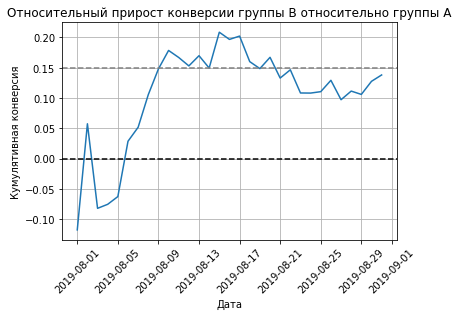

In [28]:
# добавляем новую переменную
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строим график
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.grid(True)
plt.ylabel("Кумулятивная конверсия")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y= 0.15, color='grey', linestyle='--')
plt.show()

Изначально группа В вырывалась в лидеры по конверсии и со временем зафиксировалась примерно на отметке 15% прироста относительно группы А.

---

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Для того, чтоб построить точечный график количества заказов по пользователям необходимо:
- создать новый датафрейм и в него добавить 2 столбца `visitor_id` и `transaction_id`

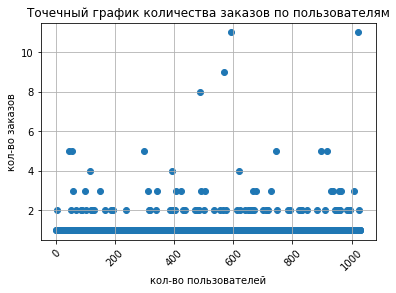

In [29]:
# добавляем новую переменную
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'}))

# серия чисел от 0 до количества наблюдений в переменной ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

# строим график
plt.scatter(x_values, ordersByUsers['transaction_id'])
plt.title('Точечный график количества заказов по пользователям')
plt.grid(True)
plt.ylabel("кол-во заказов")
plt.xlabel("кол-во пользователей")
plt.xticks(rotation=45)
plt.show()

Пользователей, заказавших более двух раз совсем мало и стремится к 0. Они могут быть аномальными и создавать выбросы в результатах.

---

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [30]:
np.percentile(ordersByUsers['transaction_id'], [90, 95, 99])

array([1., 2., 4.])

Основная масса пользователей (более 10%) совершали 1 заказ, не более 5% пользователей делали больше двух заказов и не более 1% заказывали больше четырёх раз.
Примем за аномальных пользователей тех, кто совершил **4** заказа и более, так мы уберём 1% пользователей с наибольшим числом заказов.

---

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

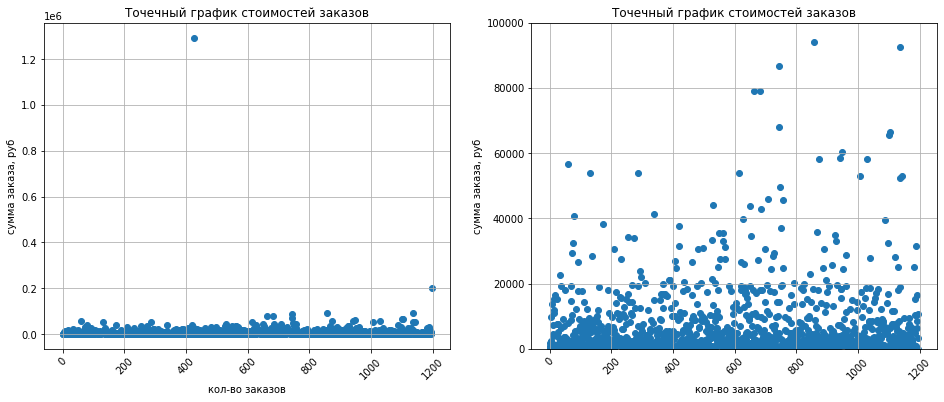

In [31]:
plt.figure(figsize=(16, 6))
x_values = pd.Series(range(0, len(orders['revenue'])))

# строим график
plt.subplot(1, 2, 1)
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.grid(True)
plt.ylabel("сумма заказа, руб")
plt.xlabel("кол-во заказов")
plt.xticks(rotation=45)

# график с ограничением по оси y, чтоб рассмотреть основную часть заказов
plt.subplot(1, 2, 2)
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.grid(True)
plt.ylabel("сумма заказа, руб")
plt.xlabel("кол-во заказов")
plt.xticks(rotation=45)
plt.ylim(0, 100000)


plt.show()

В основном сетка заказов расположилась на сумме до 100 000 рублей. Есть не очень много заказов на 200 000 рублей и выбросы в районе 1 300 000 рублей. Данный заказ выглядит очень странно для интернет магазина.

---

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [32]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более, чем у 5% заказов сумма выше 28 000 рублей. И не больше, чем у 1% заказов - дороже 58 233.2 рублей.
Примем за аномальных пользователей тех, кто совершил заказы на сумму свыше ~~**32 000 рублей**~~ 28 000 рублей, так мы уберём свыше 1% пользователей с наибольшими суммами заказов.

---

### Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.

Посчитаем статистическую значимость различий в среднем количестве заказов между группами по сырым данным. 
Сформулируем гипотезы. 
- нулевая: различий в среднем количестве заказов между группами нет. 
- альтернативная: различия в среднем между группами есть.

Зададим значение **alpha = 0.05**. Метод будем использовать **Манна-Уитни**.

Начнём с подготовки данных.

In [33]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['visitor_id', 'transaction_id']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [34]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - 
                    len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - 
                    len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


In [45]:
print("Вероятность ошибки при отклонении нулевой гипотезы {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Прирост среднего группы В к конверсии группы А равен {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Вероятность ошибки при отклонении нулевой гипотезы 0.017
Прирост среднего группы В к конверсии группы А равен 0.138


По "сырым" данным имеются различия в среднем числе заказов групп А и В.

~~Первое число~~  Поолученное значение — `p-value = 0.017` меньше 0.05 говорит о том, что вероятность получить схожиее значения в 2х группах статистически незначима. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Анализ показал, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 13.8%.

---

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [36]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


`p-value = 0.729` больше 0.05 - статистически значимых отличий в среднем чеке между группами нет. Хотя относительное различие серднего чека между сегментами составляет 25.9%.

---

### Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.

<a id='percentiles'></a>
Приступаем к подготовке очищенных от аномалий данных.

Наши 95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублей. А 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя.

Примем за аномальных пользователей тех, кто совершил **4** заказа и более, или совершил заказ на сумму свыше **32 000 рублей**. Там мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

In [37]:
orderqnt = 3
ordersum = 28000

# создаём переменную с числом заказов больше 3
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orderqnt]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > orderqnt]['visitor_id'],
    ],
    axis=0,
)
# создаём переменную с заказами дороже 32 000
usersWithExpensiveOrders = orders[orders['revenue'] > ordersum]['visitor_id']
# объединяем пользователей в одну таблицу и удаляем дубликаты
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
# количество аномальнымх пользователей 
print('Количество аномальных пользователей: {}'.format(abnormalUsers.shape[0]))

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitor_id, dtype: int64
Количество аномальных пользователей: 63


Для подсчёта статистической значимости различия среднего коилчества заказов после удаления аномальных пользователей необходимо создать ещё 2 переменные `sampleAFiltered` и `sampleBFiltered`, в которых сохраним очищенные данные о заказах.

In [38]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('{0:.4f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.0179
0.148


Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент В значительно лучше сегмента А.

---

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [39]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.977
-0.017


Отличий статистической значимости среднего чека заказов между группами после фильтрования "сырых" данных не обнаружено. Это значит, что после удаления выбросов в данных шума меньше не стало. Даже различие в 1.4% по выручке не стало статистически значимым.

---

<a id='conclusion'></a>
### Примите решение по результатам теста и объясните его. 
Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

**Итог - 1. Остановить тест, зафиксировать победу одной из групп. (Группы В над группой А)** 

## Вывод.
Вот результаты задач из этого проекта:
- Как по сырым данным, так и после фильтрации статистически значимого различия по среднему чеку между группами нет. 
- Имеется статистически значимое различие по среднему числу заказов как по сырым данным, так и после фильтрации аномалий.
- График различия конверсии между группа говорит, что результаты группы В лучше группы А. Со временем сегмент группы В зафиксировался примерно на отметке 15% прироста.

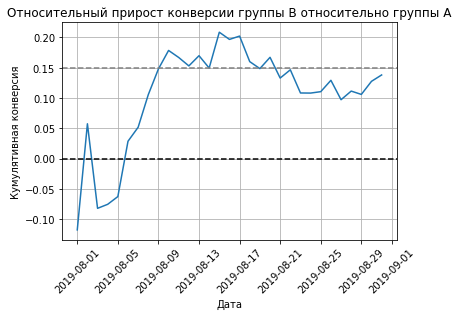

In [40]:

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.grid(True)
plt.ylabel("Кумулятивная конверсия")
plt.xlabel("Дата")
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y= 0.15, color='grey', linestyle='--')
plt.show()


График различия среднего чека колеблется: благодаря ему мы и смогли найти аномалии, а делать какие-либо выводы по нему нельзя.

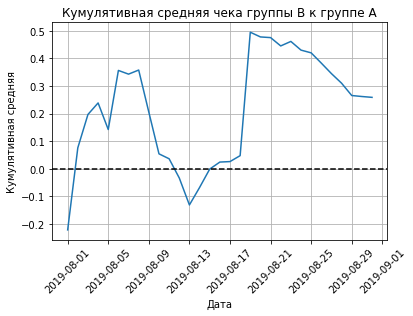

In [41]:
plt.plot(mergedCumulativeRevenue['date'], (
    mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Кумулятивная средняя чека группы В к группе А')
plt.grid(True)
plt.ylabel("Кумулятивная средняя")
plt.xlabel("Дата")
plt.xticks(rotation=45)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

И как итог - группа В зафиксировала выше результаты и одержала победу над группой А. А/В-тест является успешным.